# ML on Breast Cancer Wisconsin (Diagnostic) Data Set
About this Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# importing module 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix

In [2]:
# creating Dataframe
breast_cancer = pd.read_csv('E:\Akshay\python\Machine\exdata\data.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Data information
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
# Checking Null values
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Describing data
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Plotting Radius of Breast Cancer (mean, standard error, worst)**

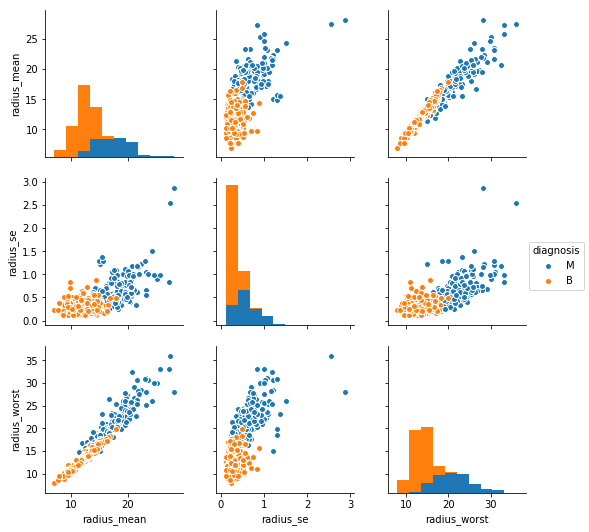

In [6]:
radius = breast_cancer[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis')

**Plotting texture of Breast Cancer (mean, standard error, worst)**

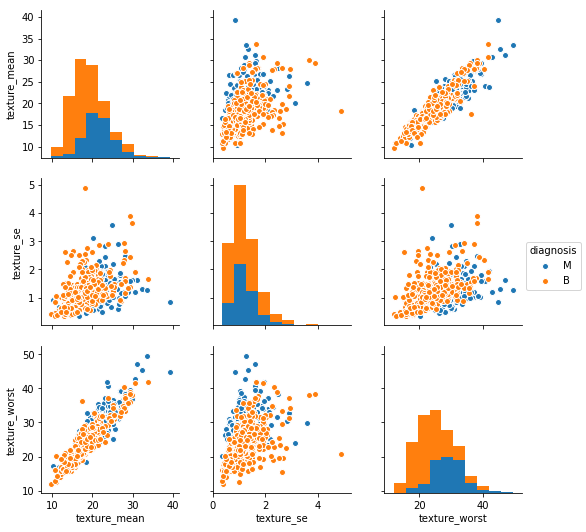

In [7]:
texture = breast_cancer[['texture_mean','texture_se','texture_worst','diagnosis']]
sns.pairplot(texture, hue='diagnosis')

**Plotting perimeter of Breast Cancer (mean, standard error, worst)**

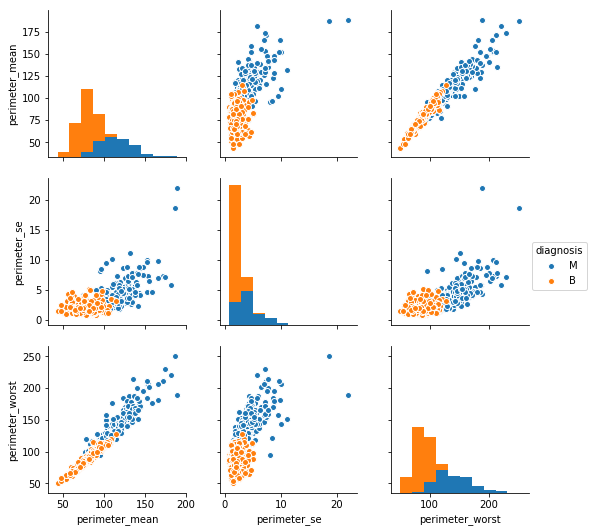

In [8]:
perimeter = breast_cancer[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
sns.pairplot(perimeter, hue='diagnosis')

**Plotting area of Breast Cancer (mean, standard error, worst)**

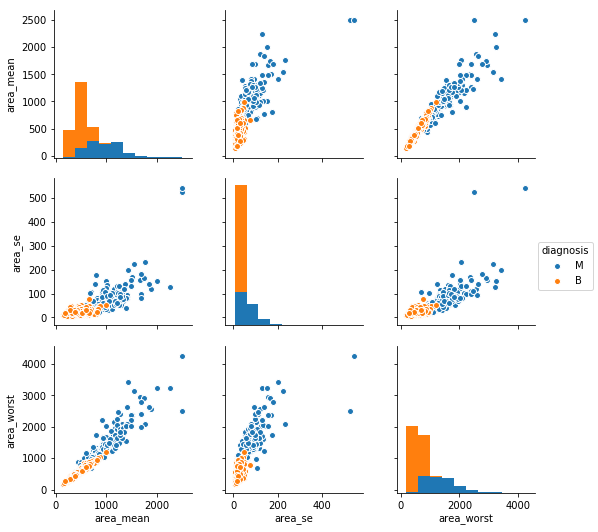

In [9]:
area = breast_cancer[['area_mean','area_se','area_worst','diagnosis']]
sns.pairplot(area, hue='diagnosis')

**Plotting smoothness of Breast Cancer (mean, standard error, worst)**

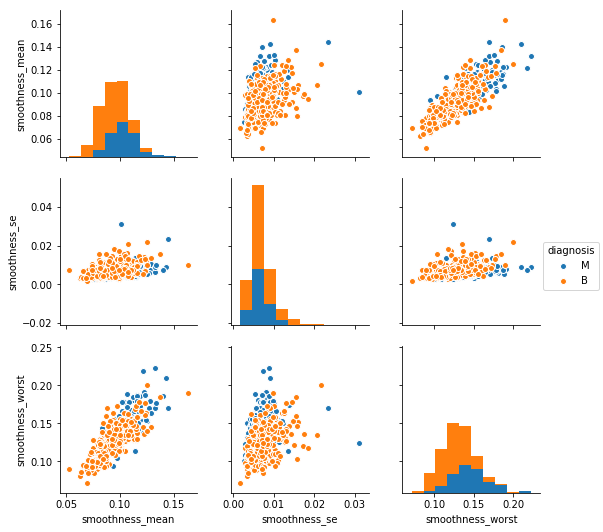

In [10]:
smoothness = breast_cancer[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
sns.pairplot(smoothness, hue='diagnosis')

**Plotting compactness of Breast Cancer (mean, standard error, worst)**

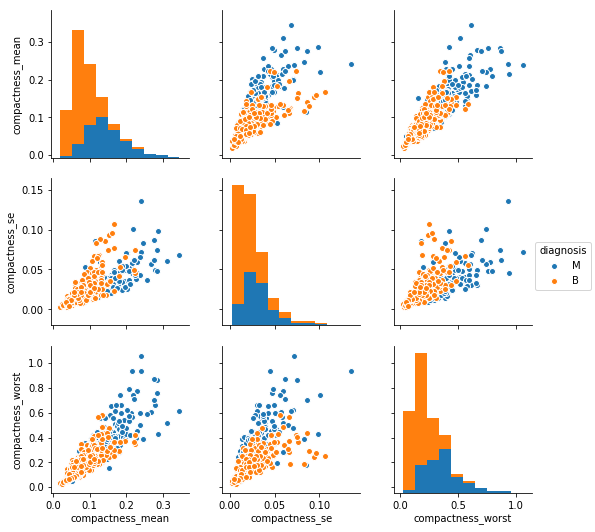

In [11]:
compactness = breast_cancer[['compactness_mean','compactness_se','compactness_worst','diagnosis']]
sns.pairplot(compactness, hue='diagnosis')

**Plotting concavity of Breast Cancer (mean, standard error, worst)**

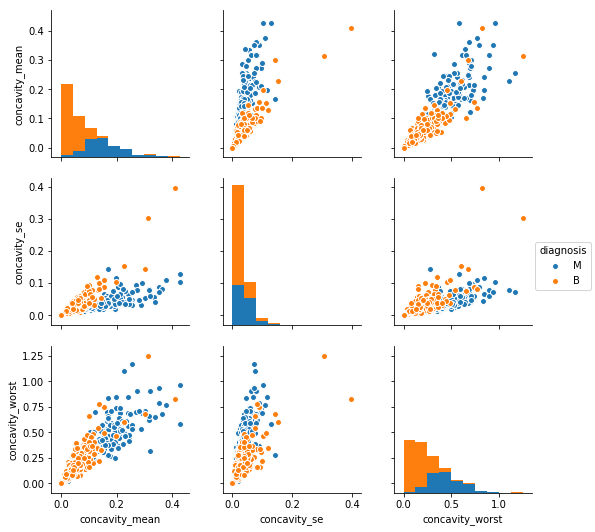

In [12]:
concavity = breast_cancer[['concavity_mean','concavity_se','concavity_worst','diagnosis']]
sns.pairplot(concavity, hue='diagnosis')

**Plotting concave points of Breast Cancer (mean, standard error, worst)**

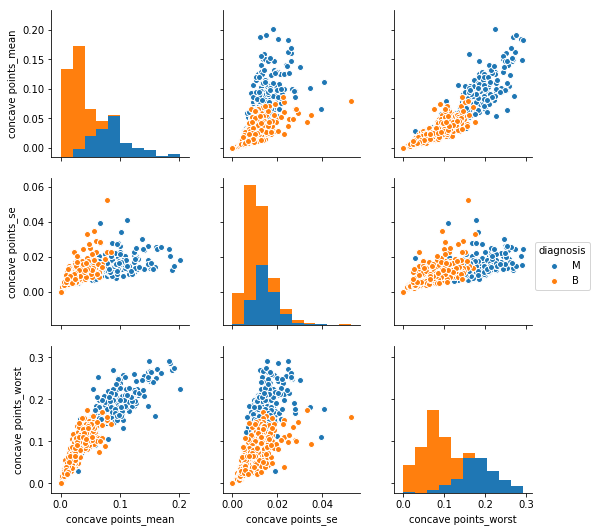

In [13]:
concave_points = breast_cancer[['concave points_mean','concave points_se','concave points_worst','diagnosis']]
sns.pairplot(concave_points, hue='diagnosis')

**Plotting symmetry of Breast Cancer (mean, standard error, worst)**

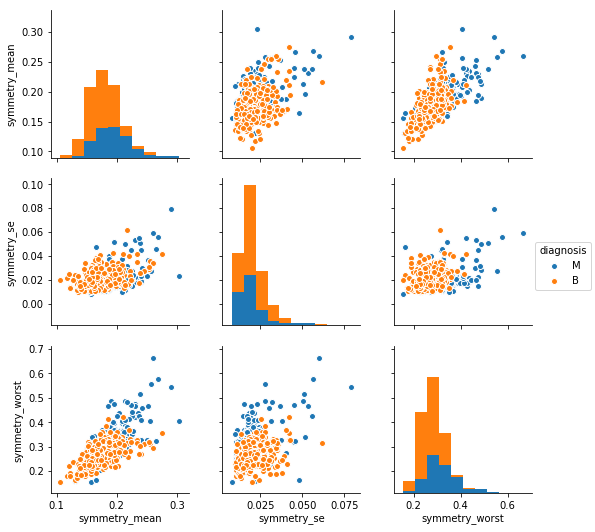

In [14]:
symmetry= breast_cancer[['symmetry_mean','symmetry_se','symmetry_worst','diagnosis']]
sns.pairplot(symmetry, hue='diagnosis')

**Plotting fractal_dimension of Breast Cancer (mean, standard error, worst)**

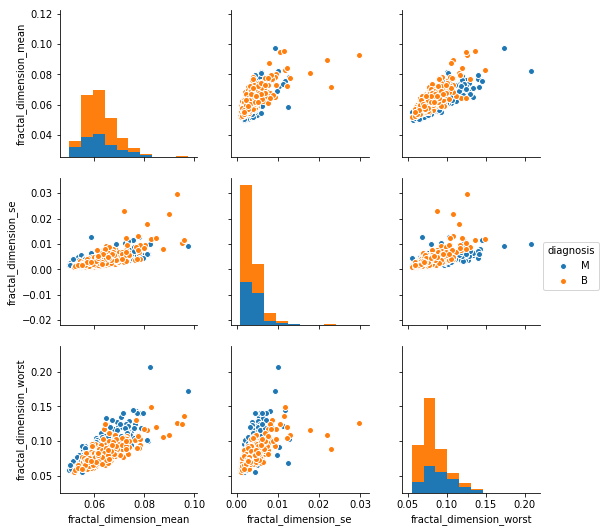

In [15]:
fractal_dimension = breast_cancer[['fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst','diagnosis']]
sns.pairplot(fractal_dimension, hue='diagnosis')

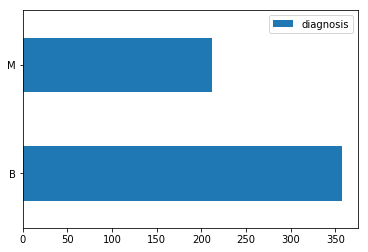

In [16]:
# Calculating Labels
Label = breast_cancer['diagnosis']
a =pd.DataFrame(Label.value_counts())
a.plot(kind='barh')

In [17]:
# Getting train Data
train =  breast_cancer.drop(['id','diagnosis','Unnamed: 32'],axis=1)

** Heatmap of 10 mean features of cancer**

c:\users\suraj\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


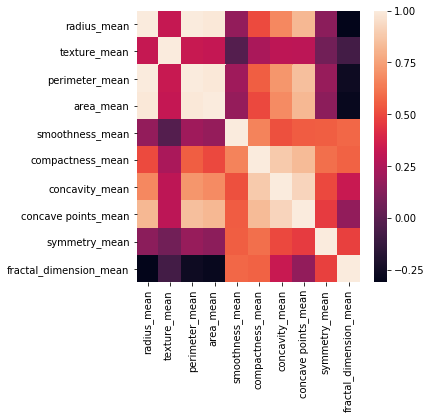

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(data=train.ix[:,0:10].corr())

** Heatmap of 10 standard error features of cancer**

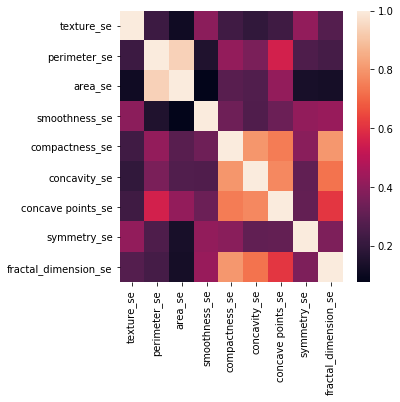

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(data=train.ix[:,11:20].corr())

** Heatmap of 10 worst features of cancer**

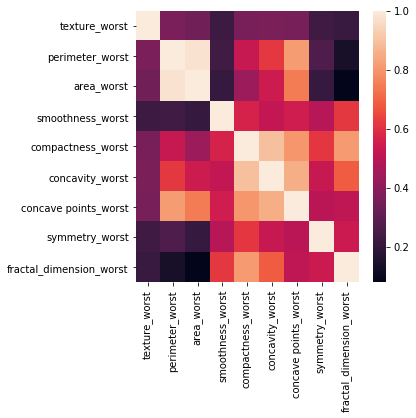

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(data=train.ix[:,21:30].corr())

** Preprossesing Data**

In [21]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

# scaling Data using StandardScaler
s = StandardScaler()
s.fit(train)
Train = s.transform(train)

# Encoding Labels
lb = LabelEncoder()
lb.fit(Label)
Target = lb.transform(Label)

In [22]:
# splitting in train and test data
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Train,Target,test_size = 0.2)

c:\users\suraj\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# importing the model for prediction

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [24]:
# creating list of tuple wth model and its name  
models = []
models.append(('GNB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('LG',LogisticRegression()))
models.append(('svc',SVC()))

In [25]:
# imorting cross Validation for calcuting score
from sklearn.cross_validation import cross_val_score

acc = []   # list for collecting Accuracy of all model
names = []    # List of model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, Y_train, cv=30, scoring='accuracy')
    
    # appending Accuray of different model to acc List
    acc.append(acc_of_model)
    
    # appending name of models
    names.append(name)
    
    # printing Output 
    Out = "%s: %f" % (name, acc_of_model.mean())
    print(Out)

GNB: 0.947103
KNN: 0.967004
DT: 0.926766
RF: 0.953333
LG: 0.976250
svc: 0.977718


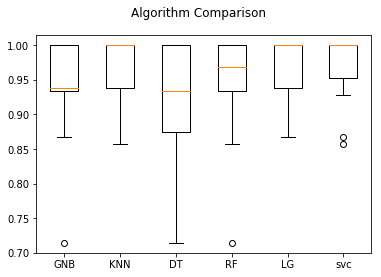

In [26]:
# Compare Algorithms Accuracy with each other on same Dataset
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc)
ax.set_xticklabels(names)
plt.show()